In [ ]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/ExcelData/train.xlsx")
df1 = pd.read_excel("/content/drive/MyDrive/ExcelData/test.xlsx")

Mounted at /content/drive


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import catboost
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

hyperspectral_data = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values
feature_names = df.columns[:-1].values

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X = hyperspectral_data
y = encoded_labels

In [ ]:
start = time.perf_counter()
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, verbose=0)

In [ ]:
model.fit(X, y)
end = time.perf_counter()

In [ ]:
# Make predictions on new data
hyperspectral_data1 = df1.iloc[:, :-1].values
labels1 = df1.iloc[:, -1].values
feature_names1 = df1.columns[:-1].values

label_encoder1 = LabelEncoder()
encoded_labels1 = label_encoder1.fit_transform(labels1)

X1 = hyperspectral_data1
y1 = encoded_labels1
predictions = model.predict(X1)
accuracy = accuracy_score(y1, predictions)
print(f"Test accuracy: {accuracy}")
print('Time taken:', end-start, 'sec')

Test accuracy: 0.822429906542056
Time taken: 285.261297574 sec


Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


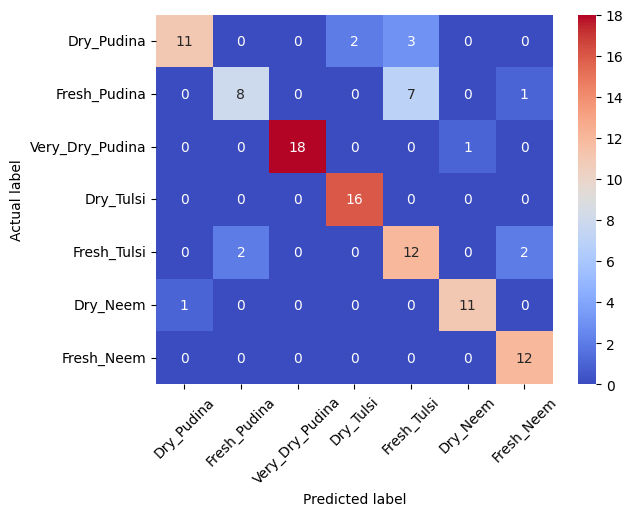

In [ ]:
y_test = label_encoder1.inverse_transform(y1)
y_pred = label_encoder1.inverse_transform(predictions)
lb = ['Dry_Pudina', 'Fresh_Pudina', 'Very_Dry_Pudina', 'Dry_Tulsi', 'Fresh_Tulsi', 'Dry_Neem', 'Fresh_Neem']
confusion_mat = confusion_matrix(y_test,y_pred, labels=lb)
print("Confusion Matrix:")
sns.heatmap(
    confusion_mat,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    xticklabels=lb,
    yticklabels=lb,
)
plt.xticks(rotation=45)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()